#Import Library

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix

#Train-Test Datasets

##Download dan Transform Dataset

In [ ]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

##Load Dataset

In [ ]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle = True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle = False)

In [ ]:
for images, labels in train_dl:
  print(images.shape, labels.shape)
  break

torch.Size([64, 1, 28, 28]) torch.Size([64])


##Visualize Data

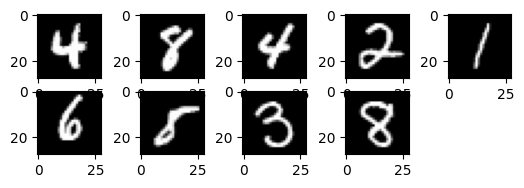

In [ ]:
figure = plt.figure()
for i in range (1, 10):
  plt.subplot(5,5,i)
  plt.imshow(images[i].numpy().squeeze(), cmap="gray")

#Neural Network Model = MLP

In [ ]:
class Mlp(nn.Module):
  def __init__(self):
    super(Mlp, self).__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)

    return x

#Loss and Optimizer

In [ ]:
model = Mlp()
los = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Training

In [ ]:
num_epochs = 3
epochs = tqdm(range(num_epochs))

for epoch in epochs:
  train_loss = []
  model.train()
  for batch in (train_dl):
    optimizer.zero_grad()
    images = batch[0].reshape(-1, 28*28)
    label = batch[1]

    output = model(images)
    loss = torch.nn.CrossEntropyLoss()(output.squeeze(-1), label)

    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

  loss_now = np.mean(train_loss)
  epochs.set_postfix({'loss': loss_now})

  0%|          | 0/3 [00:00<?, ?it/s]

#Test

In [ ]:
predlist = torch.zeros(0, dtype=torch.long)
lbllist = torch.zeros(0, dtype=torch.long)

with torch.no_grad():
  for ims, labels in test_dl:
    ims = ims.reshape(-1, 28*28)
    labels = labels
    outputs = model(ims)
    _, predicted = torch.max(outputs.data, 1)

    predlist = torch.cat([predlist, predicted.view(-1).cpu()])
    lbllist = torch.cat([lbllist, labels.view(-1).cpu()])


#Evaluation

In [ ]:
#confusion matrix
conf_mat = confusion_matrix(np.asarray(lbllist), np.asarray(predlist))
print(conf_mat)

#per-class accuracy
class_accuracy = 100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

#report
print(classification_report(np.asarray(lbllist), np.asarray(predlist), digits=3))

[[ 968    0    1    2    2    2    2    1    2    0]
 [   0 1124    1    2    0    2    3    0    3    0]
 [   5    1 1001    9    5    0    1    4    5    1]
 [   0    0    6  978    0   16    1    5    3    1]
 [   0    0    3    0  952    0    7    2    1   17]
 [   3    1    0    6    1  870    6    0    2    3]
 [   5    3    1    0    7    8  932    0    2    0]
 [   0    7   10    4    1    1    0  991    2   12]
 [   4    1    4   15    6    8    4    4  927    1]
 [   3    6    0    9   10    5    1    5    1  969]]
[98.7755102  99.030837   96.99612403 96.83168317 96.94501018 97.53363229
 97.28601253 96.40077821 95.17453799 96.03567889]
              precision    recall  f1-score   support

           0      0.980     0.988     0.984       980
           1      0.983     0.990     0.987      1135
           2      0.975     0.970     0.972      1032
           3      0.954     0.968     0.961      1010
           4      0.967     0.969     0.968       982
           5      0.9

#Describe

Mesin diatas menggunakan arsitektur neural network MLP (Multi Layer Perceptron). MLP diatas menggunakan algoritma backpropagation pada training data dan memiliki 3 hidden layer. Pada mesin diatas menggunakan method cross-entropy loss dan optimzer adam dalam pytorch. cross-entropy loss merupakan metrik yang digunakan untuk mengukur seberapa baik model klasifikasi dan optimizer adam digunakan untuk mengoptimalkan parameter dari model yang digunakan. pada hasil evaluasi, didapatkan bahwasanya accurasi yang dihasilkan yakni sebesar 97%